In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import warnings
warnings.filterwarnings('ignore')


In [52]:
df = pd.read_csv('election2024.csv')
df.sample(1)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
74,07166299070ce73c,male,22.0,siberian,city with population of 1 million and higher,named correct date,likely no,Putin,does not watch,less than 4 hours a day,school,high,employed student,commercial organization,trade,1.476248


In [53]:
df.columns

Index(['id', 'sex', 'age', 'federal_district', 'type_of_city',
       'knows_election_date', 'will_vote', 'candidate', 'television_usage',
       'internet_usage', 'education', 'income', 'employment', 'job_type',
       'company_type', 'weight1'],
      dtype='object')

In [54]:
df.shape

(1600, 16)

In [55]:
# INSIGHTS >> rows = 1600, columns = 16

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   1600 non-null   object 
 1   sex                  1600 non-null   object 
 2   age                  1600 non-null   float64
 3   federal_district     1600 non-null   object 
 4   type_of_city         1600 non-null   object 
 5   knows_election_date  1600 non-null   object 
 6   will_vote            1600 non-null   object 
 7   candidate            1600 non-null   object 
 8   television_usage     1600 non-null   object 
 9   internet_usage       1600 non-null   object 
 10  education            1600 non-null   object 
 11  income               1600 non-null   object 
 12  employment           1600 non-null   object 
 13  job_type             692 non-null    object 
 14  company_type         879 non-null    object 
 15  weight1              1600 non-null   f

In [57]:
df.isnull().sum()

id                       0
sex                      0
age                      0
federal_district         0
type_of_city             0
knows_election_date      0
will_vote                0
candidate                0
television_usage         0
internet_usage           0
education                0
income                   0
employment               0
job_type               908
company_type           721
weight1                  0
dtype: int64

In [ ]:
# INSIGHTS
# there are 908 null values in job_type
# 721 null values in company_type

In [58]:
# percentage of null values in both the columns

percent_null_job_type = (df['job_type'].isnull().sum() / len(df)) * 100
percent_null_company_type = (df['company_type'].isnull().sum() / len(df)) * 100

print(f"% of null values in 'job_type': {percent_null_job_type:.2f}%")
print(f"% of null values in 'company_type': {percent_null_company_type:.2f}%")


% of null values in 'job_type': 56.75%
% of null values in 'company_type': 45.06%


In [59]:
# Since null value % is > 50 so dropping the columns 

df = df.drop(columns=['job_type', 'company_type'])
df.head(3)

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,1.301691


In [60]:
df['id'].nunique()

1600

In [61]:
# dropping the id column as well 

df = df.drop('id' , axis=1)

In [62]:
df.head(2)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,1.445172
1,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,1.445172


In [63]:
df.duplicated().sum()

# no duplicates value

np.int64(0)

In [64]:
df['sex'].value_counts()

sex
female    843
male      757
Name: count, dtype: int64

In [65]:
sex_ratio = df['sex'].value_counts(normalize=True)*100

In [66]:
sex_ratio

sex
female    52.6875
male      47.3125
Name: proportion, dtype: float64

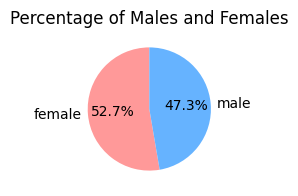

In [67]:
plt.figure(figsize=(2,2))
plt.pie(sex_ratio , labels=sex_ratio.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff'] )
plt.title('Percentage of Males and Females')
plt.show()

In [26]:
# INSIGHTS>> females(52) are more than males(47) 

In [68]:
# converting sex column into int
# female = 1
# male = 0
df['sex'] = df['sex'].map({'female' : 1 , 'male' : 0})

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   int64  
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  weight1              1600 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 162.6+ KB


In [71]:
df['weight1'].nunique()

569

In [72]:
# We have columns in float64 , converting them into int

df['age'] = df['age'].astype(int)
df['weight1'] = df['weight1'].astype(int)


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   sex                  1600 non-null   int64 
 1   age                  1600 non-null   int64 
 2   federal_district     1600 non-null   object
 3   type_of_city         1600 non-null   object
 4   knows_election_date  1600 non-null   object
 5   will_vote            1600 non-null   object
 6   candidate            1600 non-null   object
 7   television_usage     1600 non-null   object
 8   internet_usage       1600 non-null   object
 9   education            1600 non-null   object
 10  income               1600 non-null   object
 11  employment           1600 non-null   object
 12  weight1              1600 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 162.6+ KB


In [74]:
# seperate categorical columns

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment']

In [75]:
# seperate numerical columns

num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['sex', 'age', 'weight1']

In [76]:
for col in cat_cols:
    print(f" {col} has : \n {df[col].unique()}  unique values\n")

 federal_district has : 
 ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']  unique values

 type_of_city has : 
 ['village' 'city with population of less than 50k'
 'city with population of 1 million and higher'
 'city with population of 50-100k' 'city with population of 100-500k'
 'settlement' 'city with population of 500-950k']  unique values

 knows_election_date has : 
 ['named correct date' 'not sure or no answer' 'wrong answer'
 'named correct year']  unique values

 will_vote has : 
 ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer']  unique values

 candidate has : 
 ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy']  unique values

 television_usage has : 
 ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month']  unique values

 internet_usage has : 
 ['over 4 ho

In [77]:
df['income'].value_counts()

income
medium         949
high           405
low            149
very high       48
very low        34
hard to say     15
Name: count, dtype: int64

In [78]:
df['type_of_city'].value_counts()

type_of_city
city with population of 100-500k                391
village                                         366
city with population of 1 million and higher    307
city with population of less than 50k           179
city with population of 500-950k                170
city with population of 50-100k                 106
settlement                                       81
Name: count, dtype: int64

In [79]:
df['type_of_city'] = df['type_of_city'].str.lower().str.strip()

mapping = {
    'city with population of 100-500k': 'city 100-500k',
    'city with population of 1 million and higher': 'city 1 million and higher',
    'city with population of less than 50k': 'city <50k',
    'city with population of 500-950k': 'city 500-950k',
    'city with population of 50-100k': 'city 50-100k',
    'settlement': 'settlement',
    'village': 'village'
}
df['type_of_city'] = df['type_of_city'].map(mapping)


In [80]:
print(df['type_of_city'].value_counts())

type_of_city
city 100-500k                391
village                      366
city 1 million and higher    307
city <50k                    179
city 500-950k                170
city 50-100k                 106
settlement                    81
Name: count, dtype: int64


In [81]:
df['knows_election_date'] = df['knows_election_date'].replace(to_replace= {'named correct date' : 'yes' , 'not sure or no answer' : 'no' , 'wrong answer' : 'no' , 'named correct year' : 'no' })


In [82]:
df['knows_election_date'].value_counts()

knows_election_date
yes    1361
no      239
Name: count, dtype: int64

In [83]:
for col in cat_cols:
    print(f" {col} has : \n {df[col].unique()}  unique values\n")

 federal_district has : 
 ['north caucasian' 'volga' 'northwestern' 'southern' 'central' 'ural'
 'siberian' 'far eastern']  unique values

 type_of_city has : 
 ['village' 'city <50k' 'city 1 million and higher' 'city 50-100k'
 'city 100-500k' 'settlement' 'city 500-950k']  unique values

 knows_election_date has : 
 ['yes' 'no']  unique values

 will_vote has : 
 ['not sure' 'definitely yes' 'likely no' 'definitely no' 'likely yes'
 'struggle to answer']  unique values

 candidate has : 
 ['Putin' 'Davankov' 'will not take part' 'spoilt vote' 'Kharitonov'
 'struggle to answer' 'Slutskiy']  unique values

 television_usage has : 
 ['several times a week' 'once half a year' 'does not watch'
 'less than 4 hours a day' 'over 4 hours a day' 'several times a month']  unique values

 internet_usage has : 
 ['over 4 hours a day' 'less than 4 hours a day' 'several times a week'
 'does not use internet' 'several times a month' 'once half a year']  unique values

 education has : 
 ['incomplete 

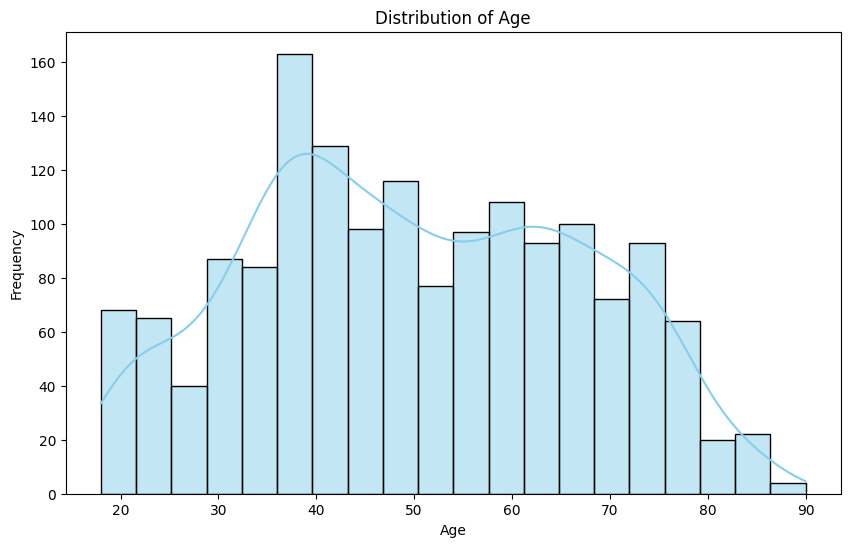

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# INSIGHTS>>
# avg age is 50 
# minimum age is 18
# maximum age is 90
# There is a relatively small number of people in the 80-90 age group.
# majority of people have age between 35-40

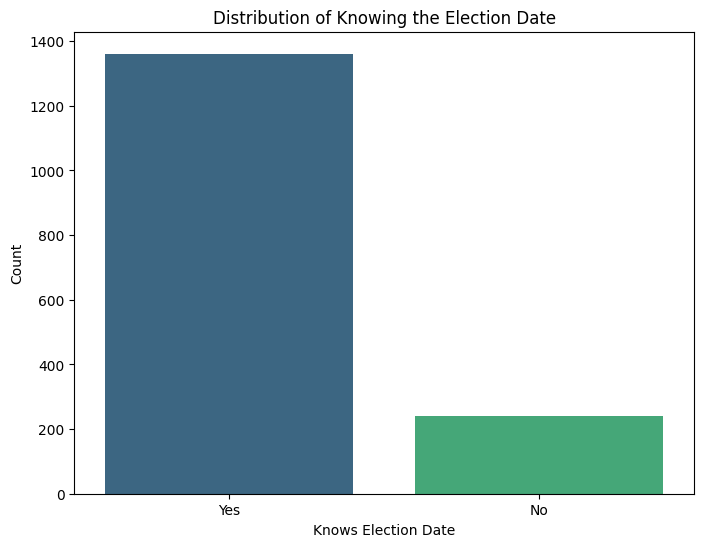

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='knows_election_date', data=df, palette='viridis')
plt.title('Distribution of Knowing the Election Date')
plt.xlabel('Knows Election Date')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Yes', 'No'])
plt.show()

In [63]:
# INSIGHTS>>
# majority of people (85%) knows the election date


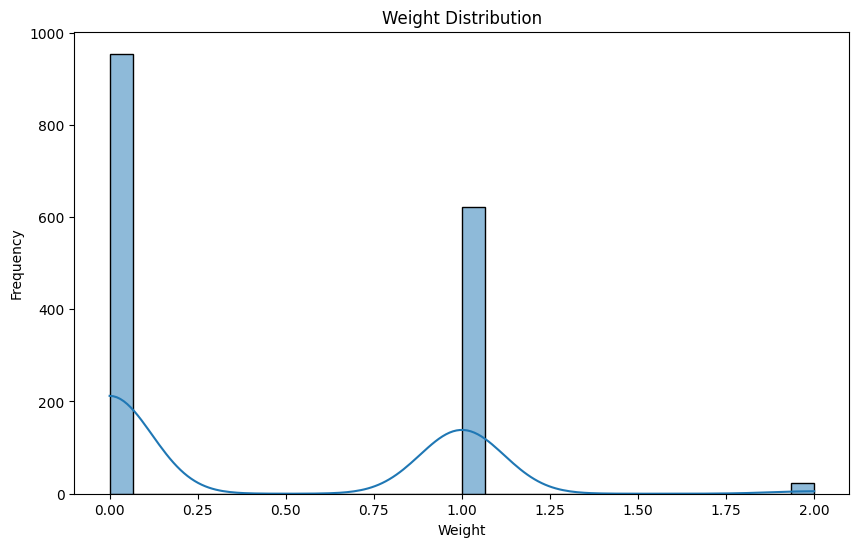

In [84]:
# Distribution of weight1
plt.figure(figsize=(10, 6))
sns.histplot(df['weight1'], kde=True, bins=30)
plt.title('Weight Distribution')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

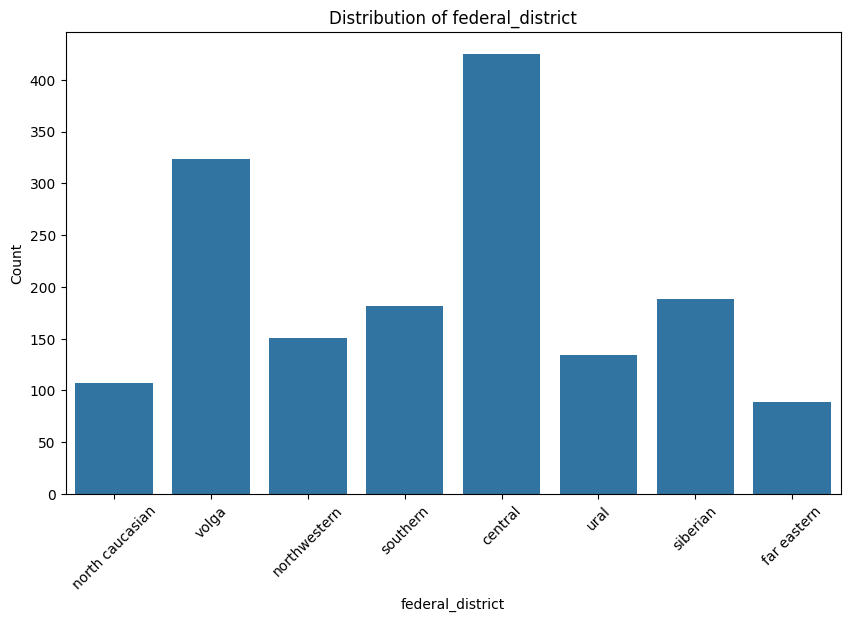

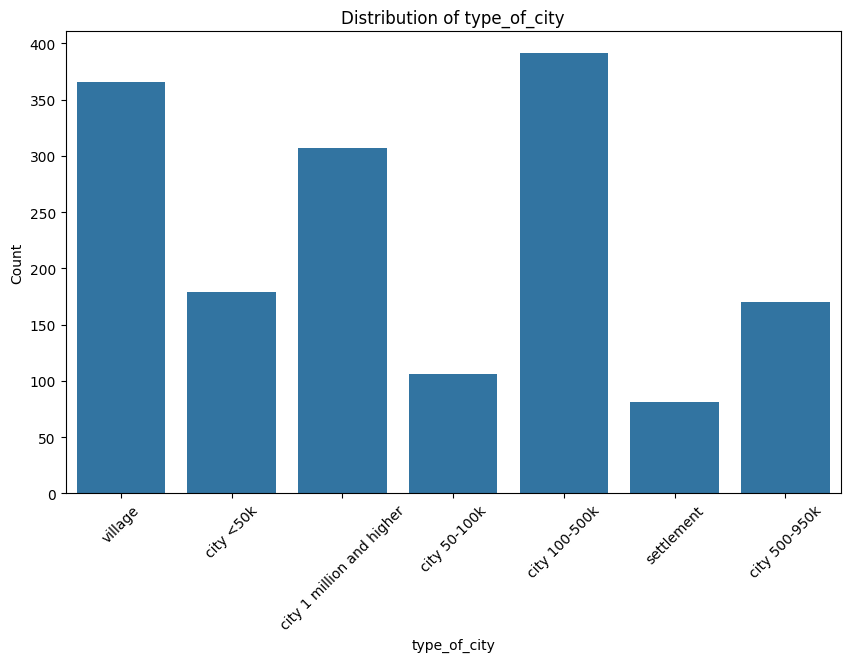

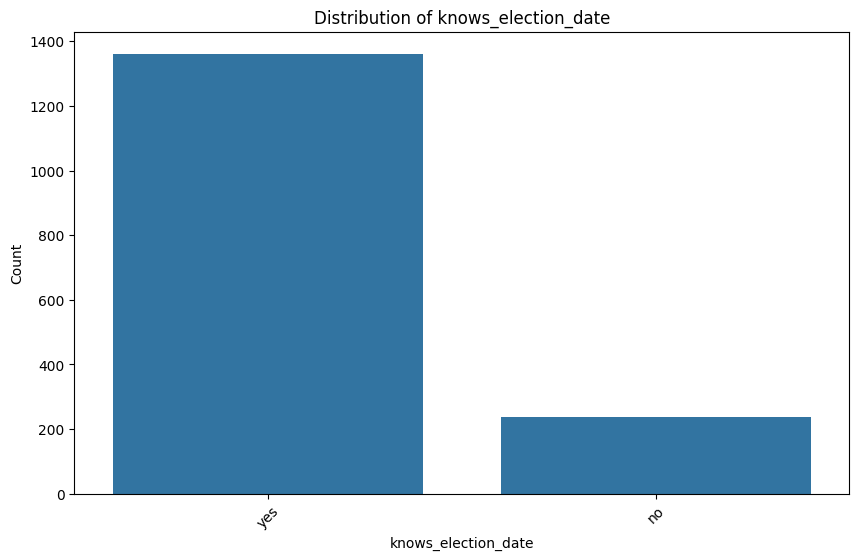

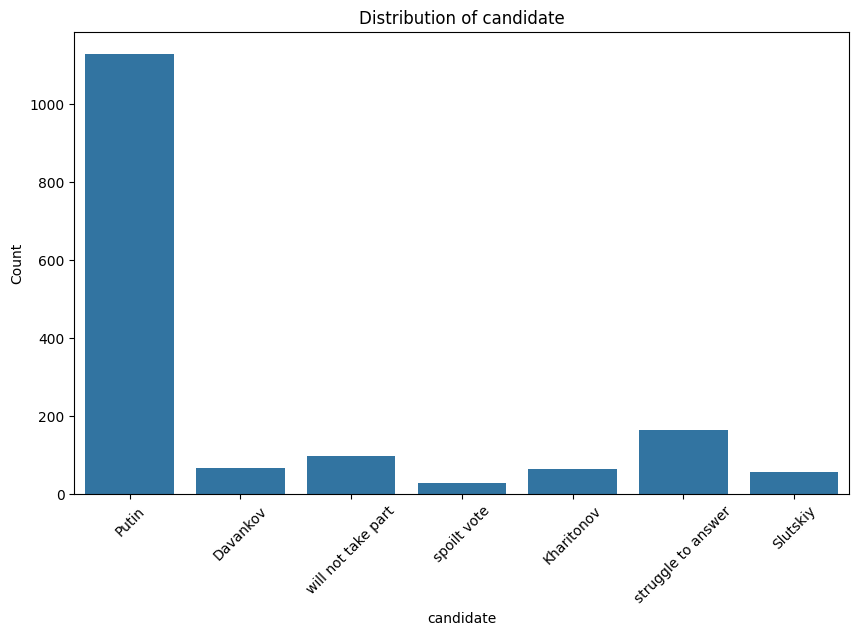

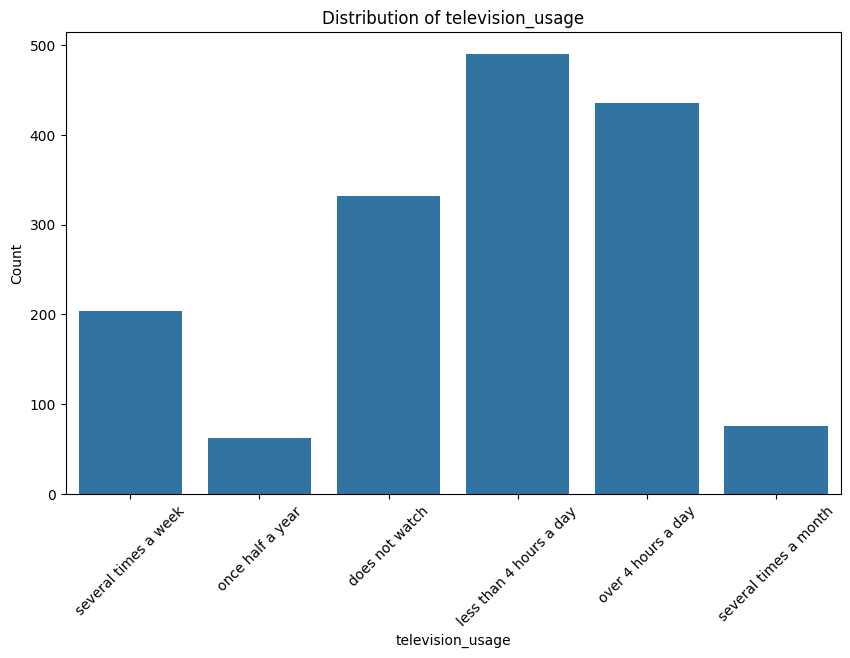

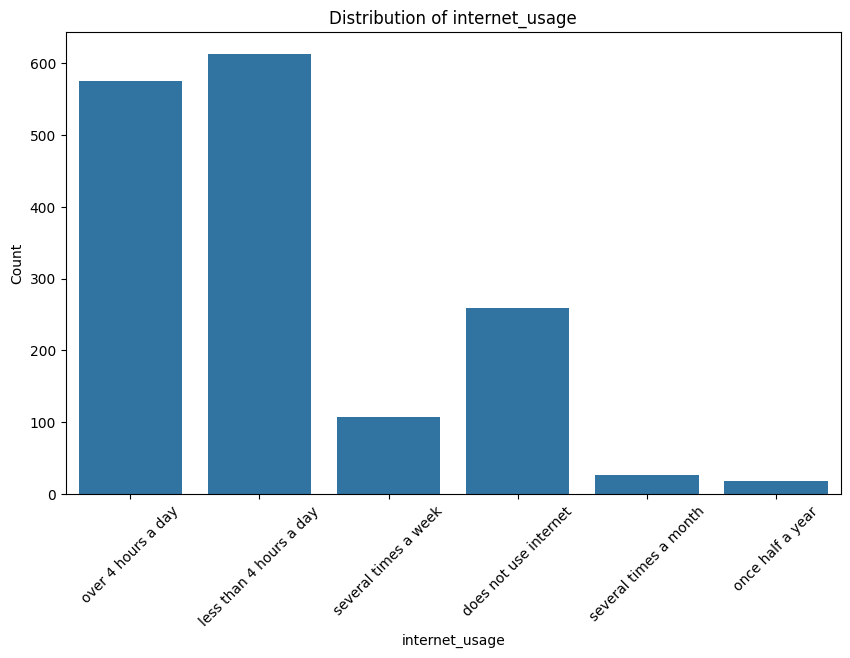

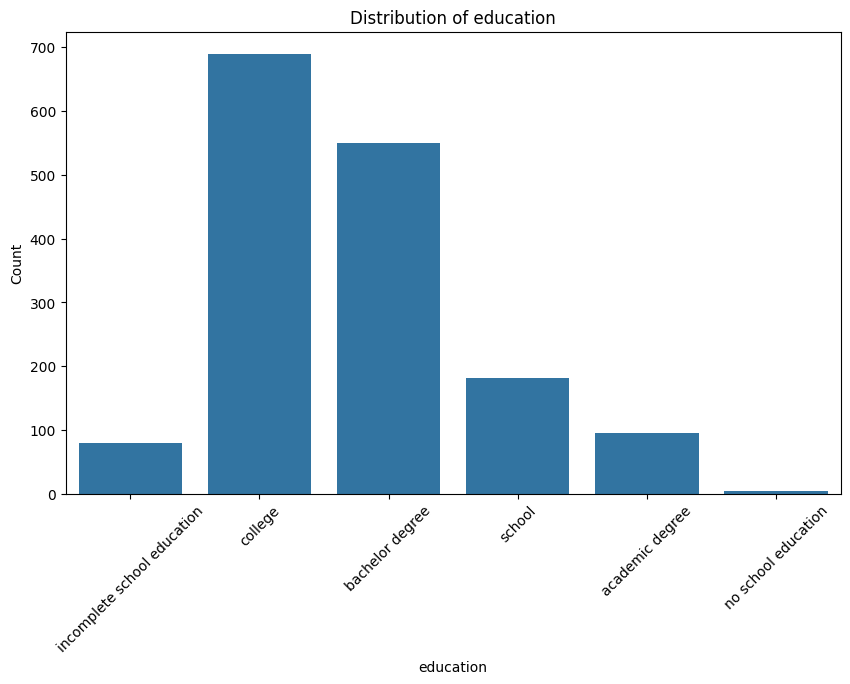

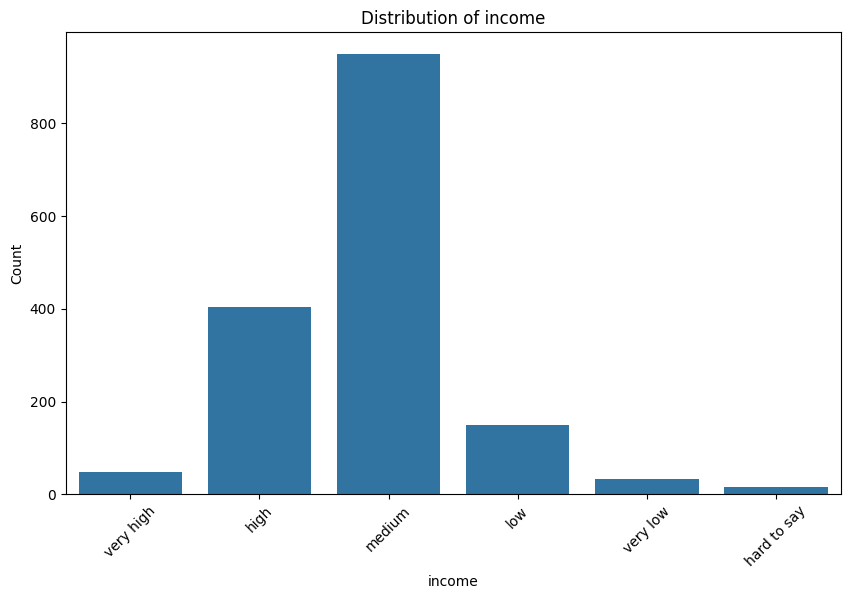

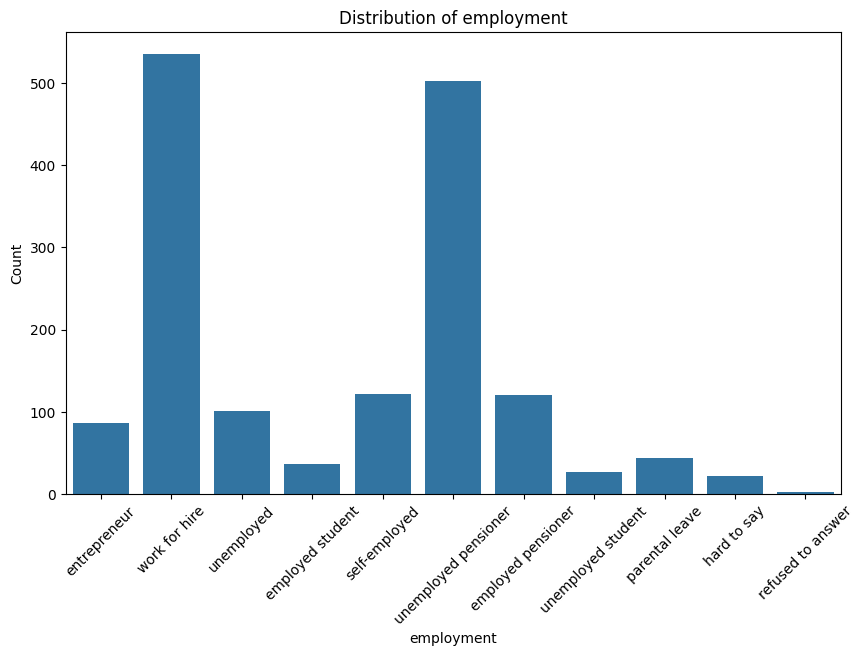

In [85]:
# Visualizing categorical variables
for col in cat_cols:
    if col != 'will_vote':
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x=col)
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()


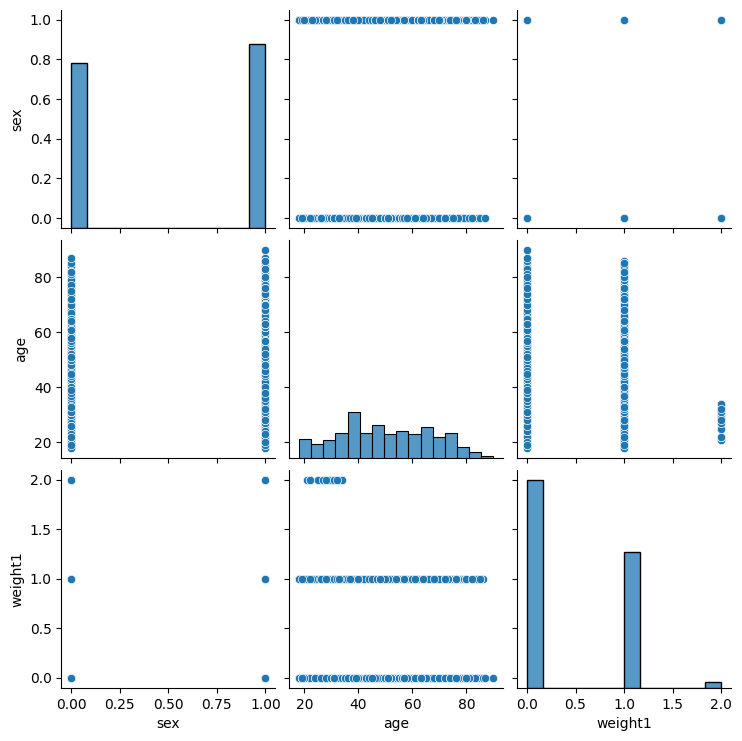

In [86]:
# Pair plot for numerical features
sns.pairplot(df[num_cols])
plt.show()


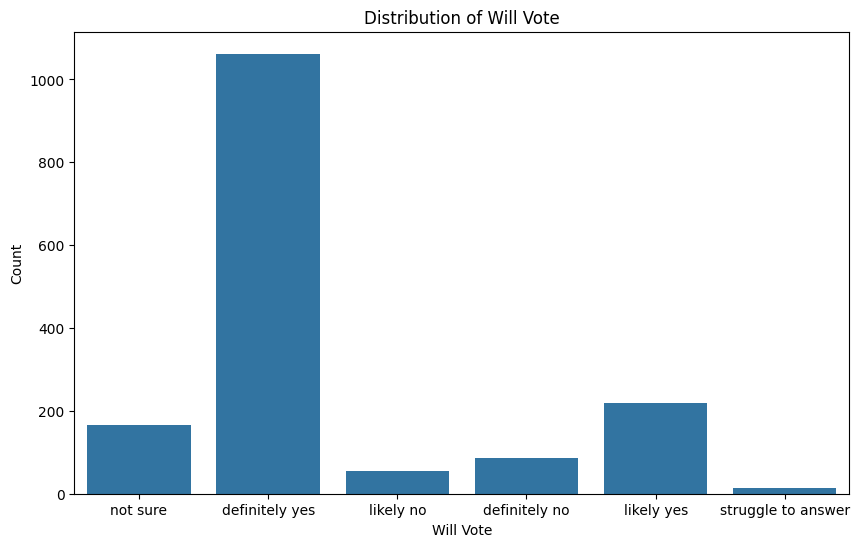

In [88]:
# Distribution of target variable
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='will_vote')
plt.title('Distribution of Will Vote')
plt.xlabel('Will Vote')
plt.ylabel('Count')
plt.show()


In [ ]:
# INSIGHTS>>
# counts of people who will definitely vote is more as compared to others 

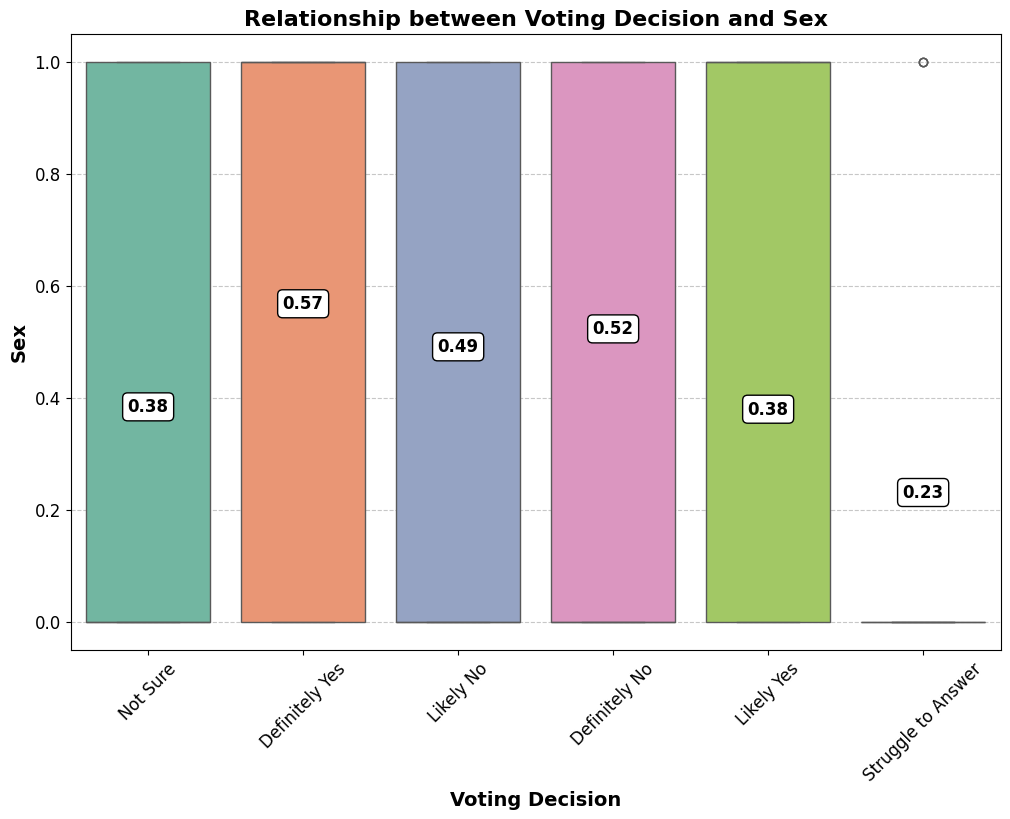

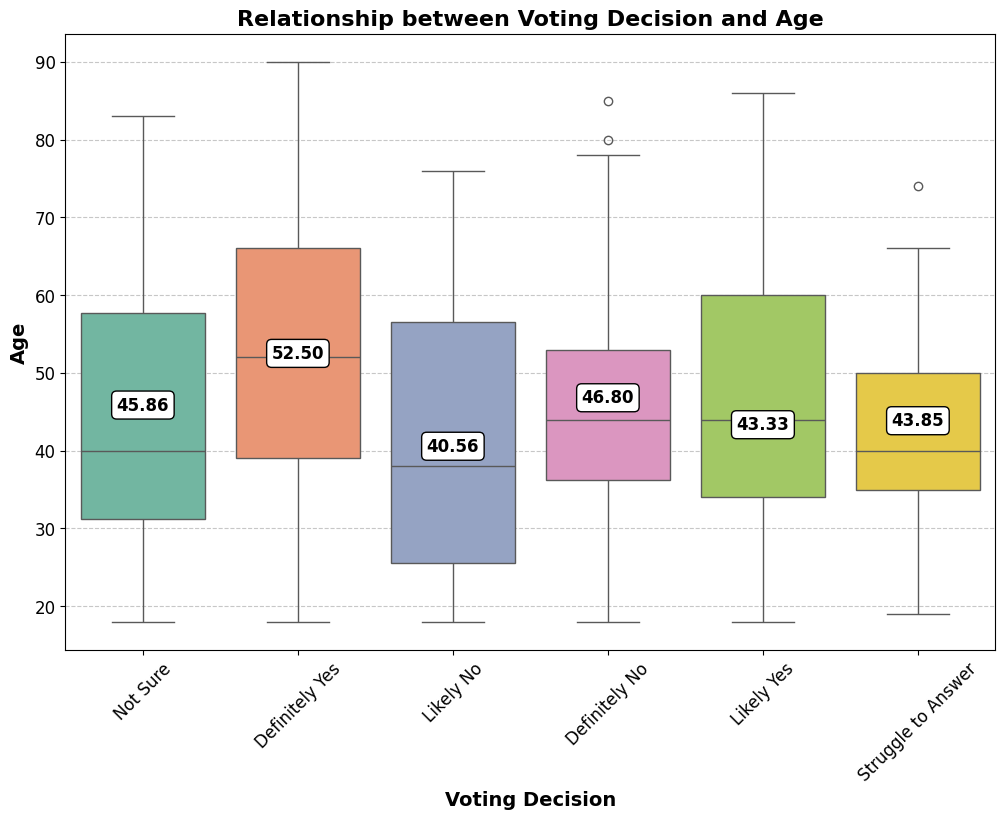

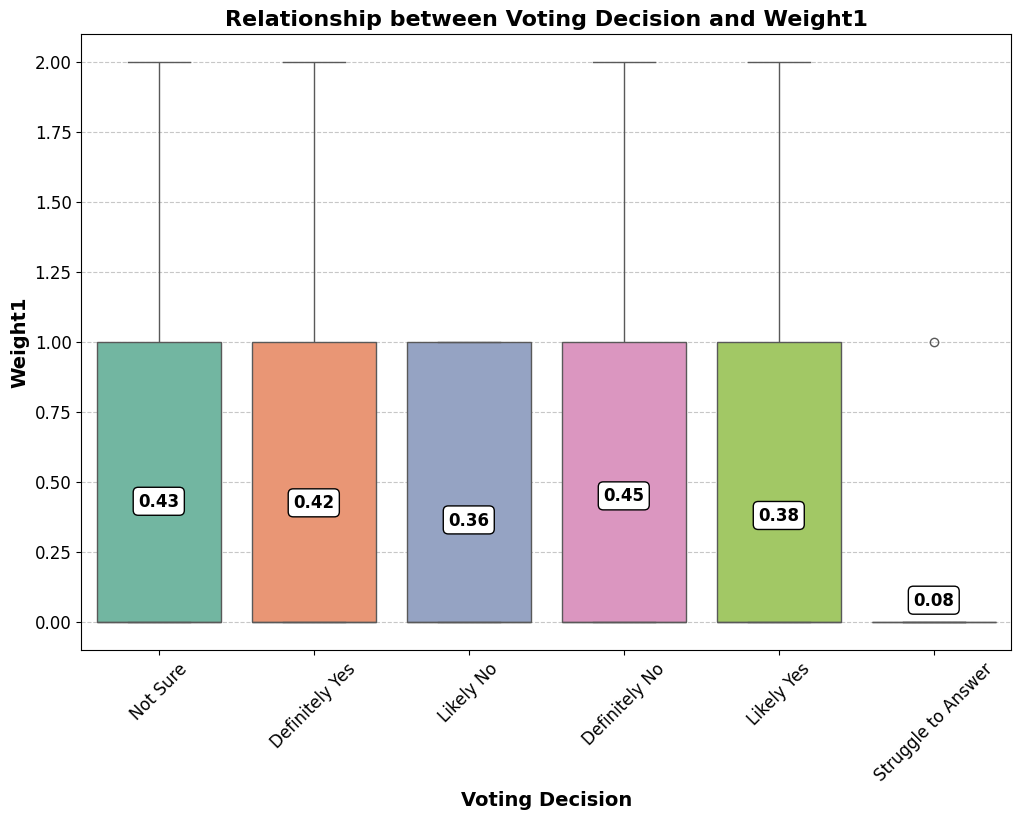

In [90]:
# Relationship between target variable and numerical features

for col in num_cols:
    plt.figure(figsize=(12, 8))
    
    # Box plot with color
    sns.boxplot(data=df, x='will_vote', y=col, palette='Set2')
    
    # Overlay mean values
    means = df.groupby('will_vote')[col].mean().values
    for i, mean in enumerate(means):
        plt.text(i, mean, f'{mean:.2f}', ha='center', va='center', color='black', fontsize=12, fontweight='bold', bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3'))
    
    # Add a detailed title and axis labels
    plt.title(f'Relationship between Voting Decision and {col.capitalize()}', fontsize=16, fontweight='bold')
    plt.xlabel('Voting Decision', fontsize=14, fontweight='bold')
    plt.ylabel(f'{col.capitalize()}', fontsize=14, fontweight='bold')
    
    # Customize ticks
    plt.xticks(ticks=[0, 1, 2, 3, 4, 5], labels=['Not Sure', 'Definitely Yes', 'Likely No', 'Definitely No', 'Likely Yes', 'Struggle to Answer'], rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    plt.show()


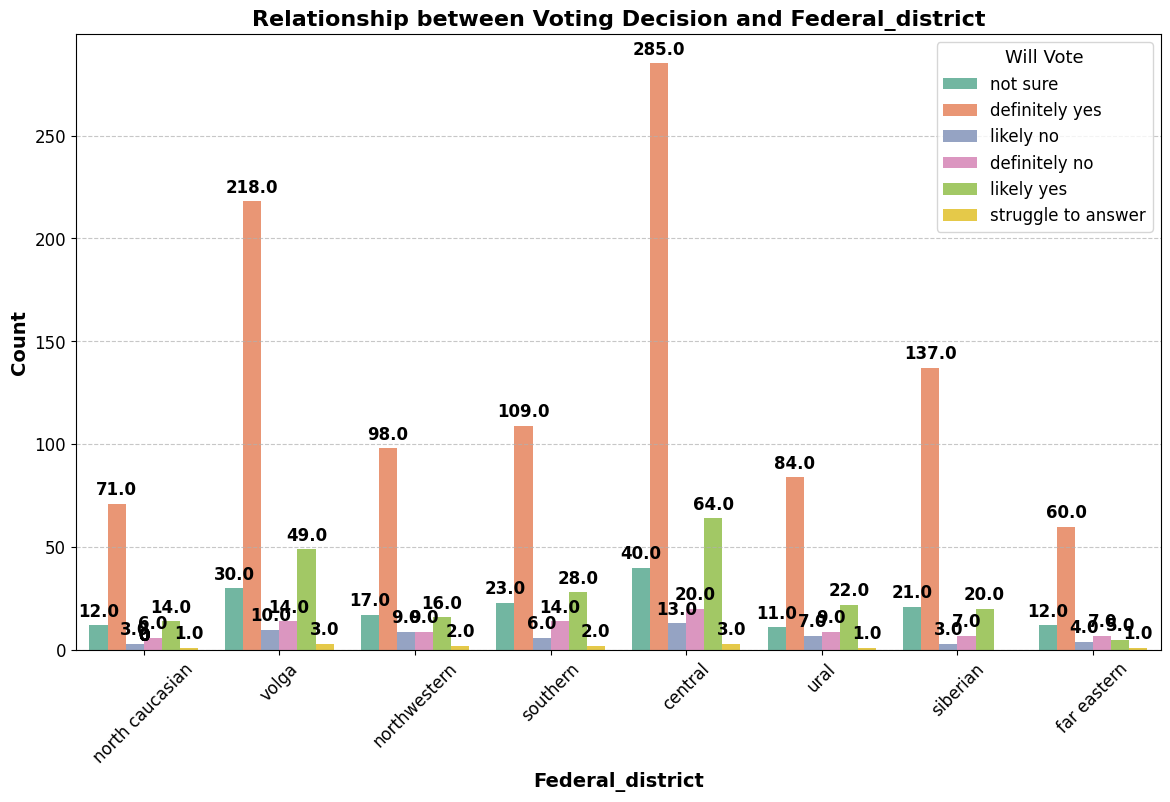

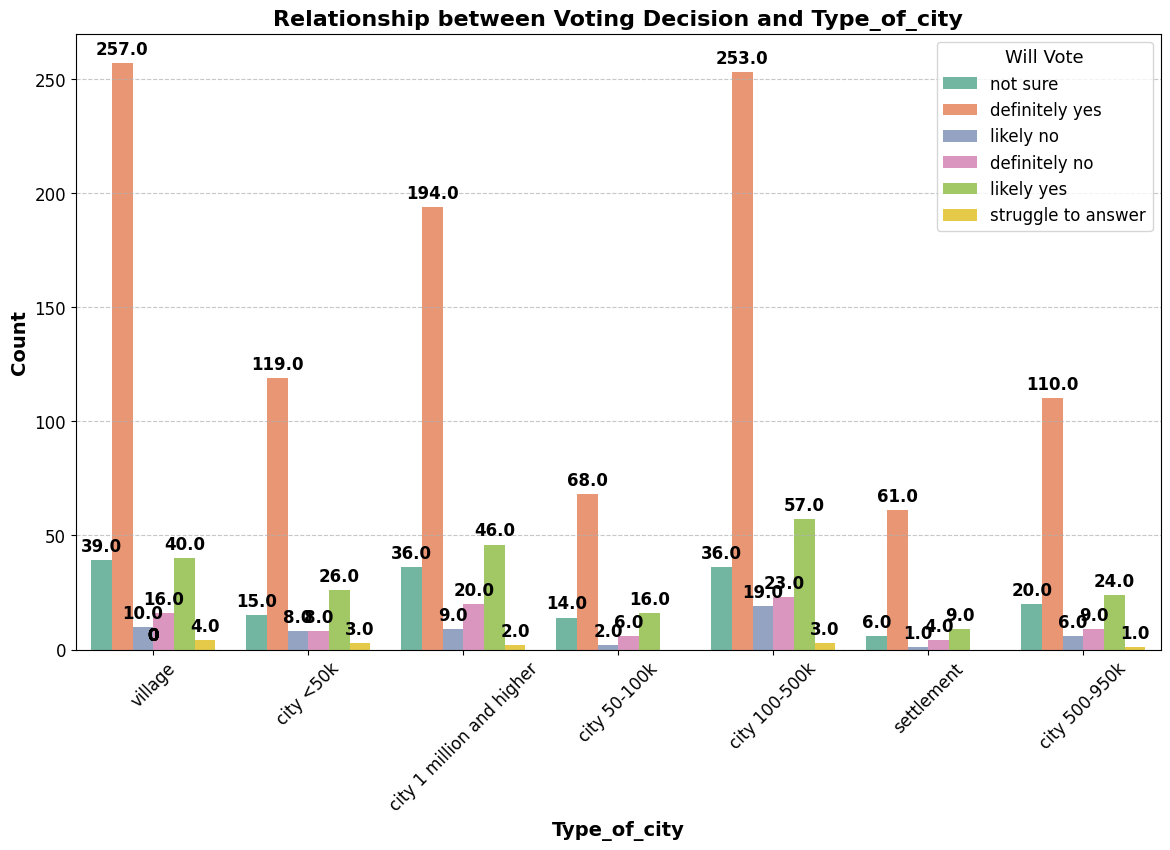

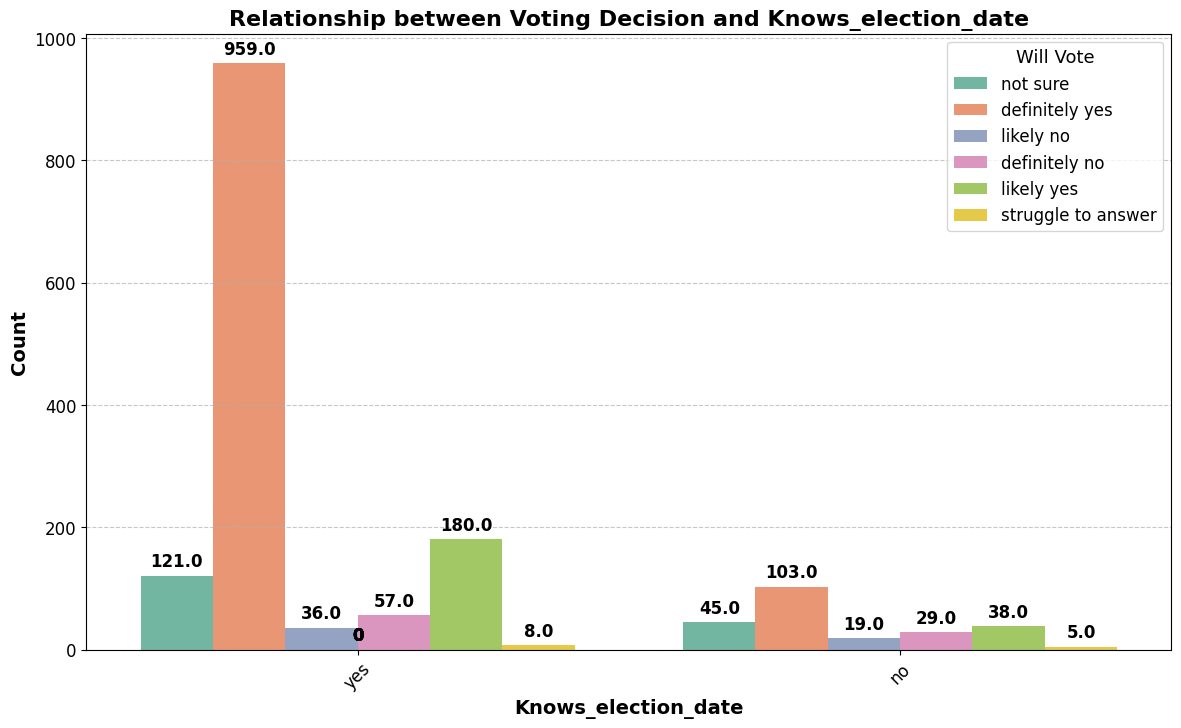

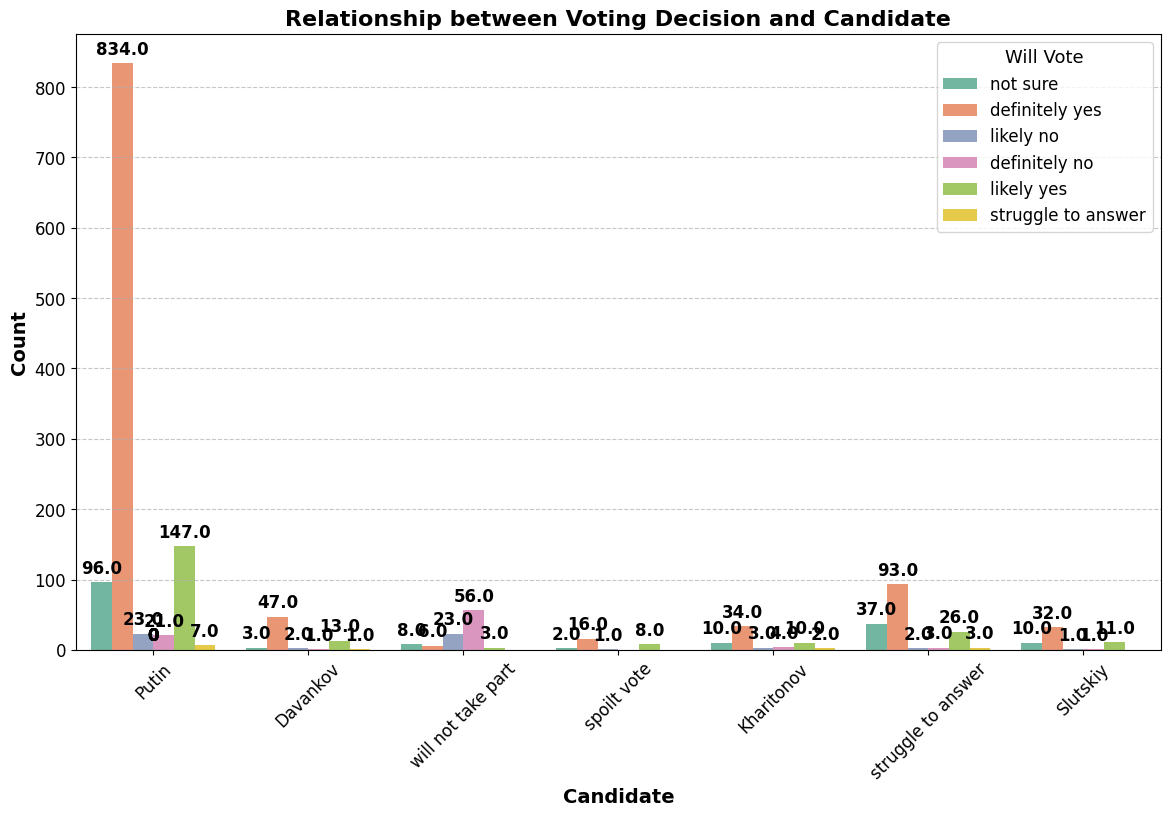

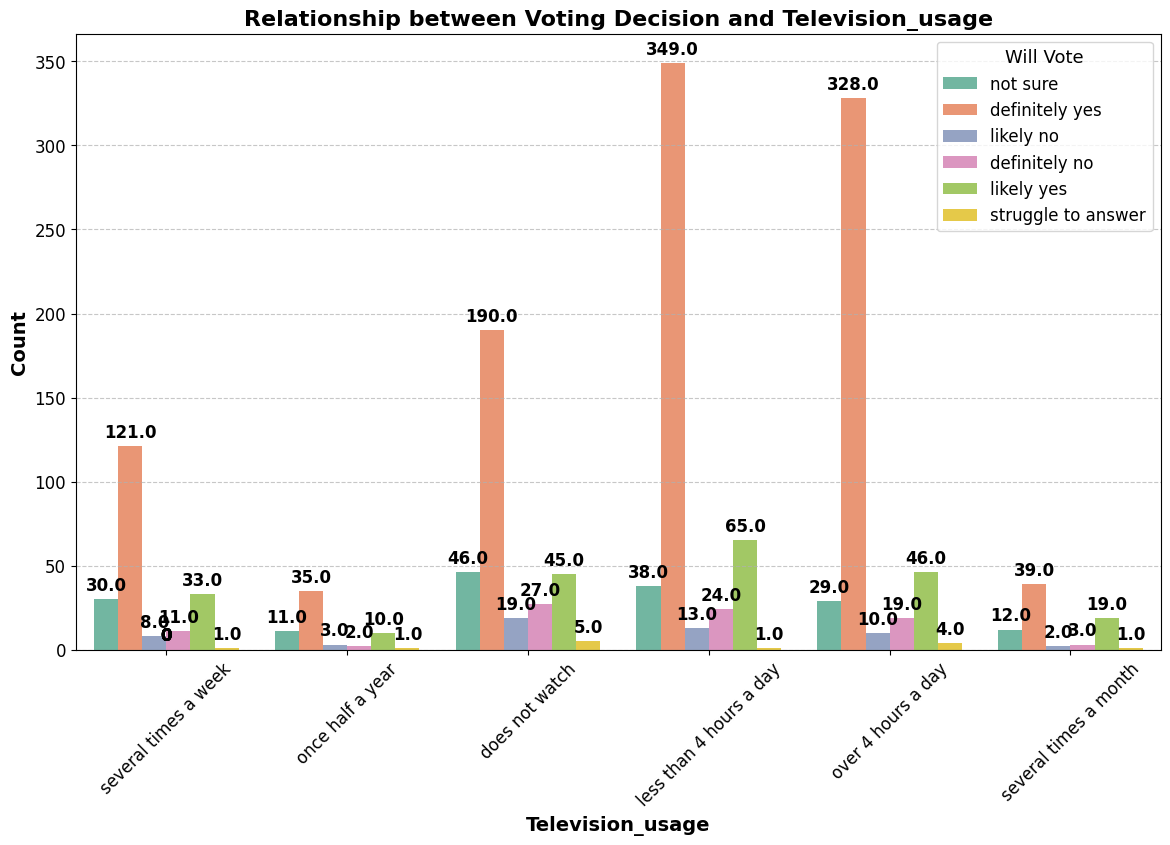

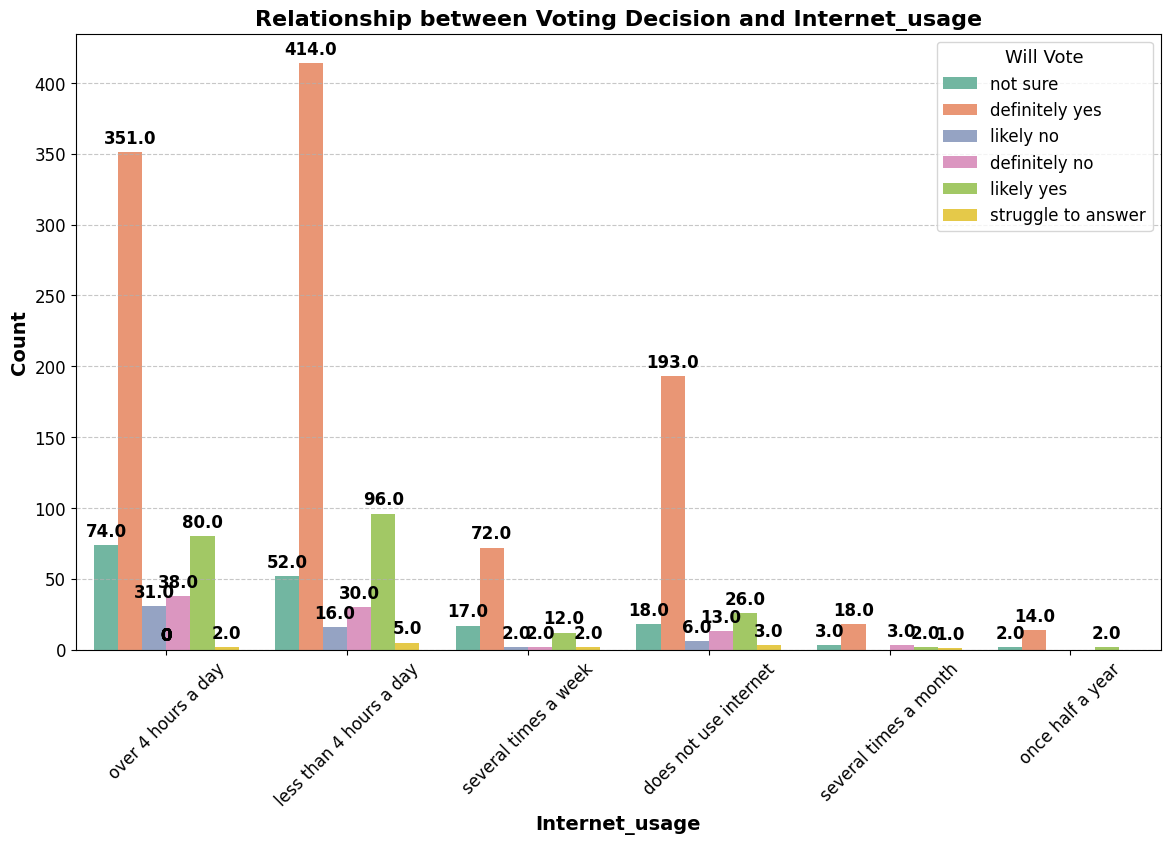

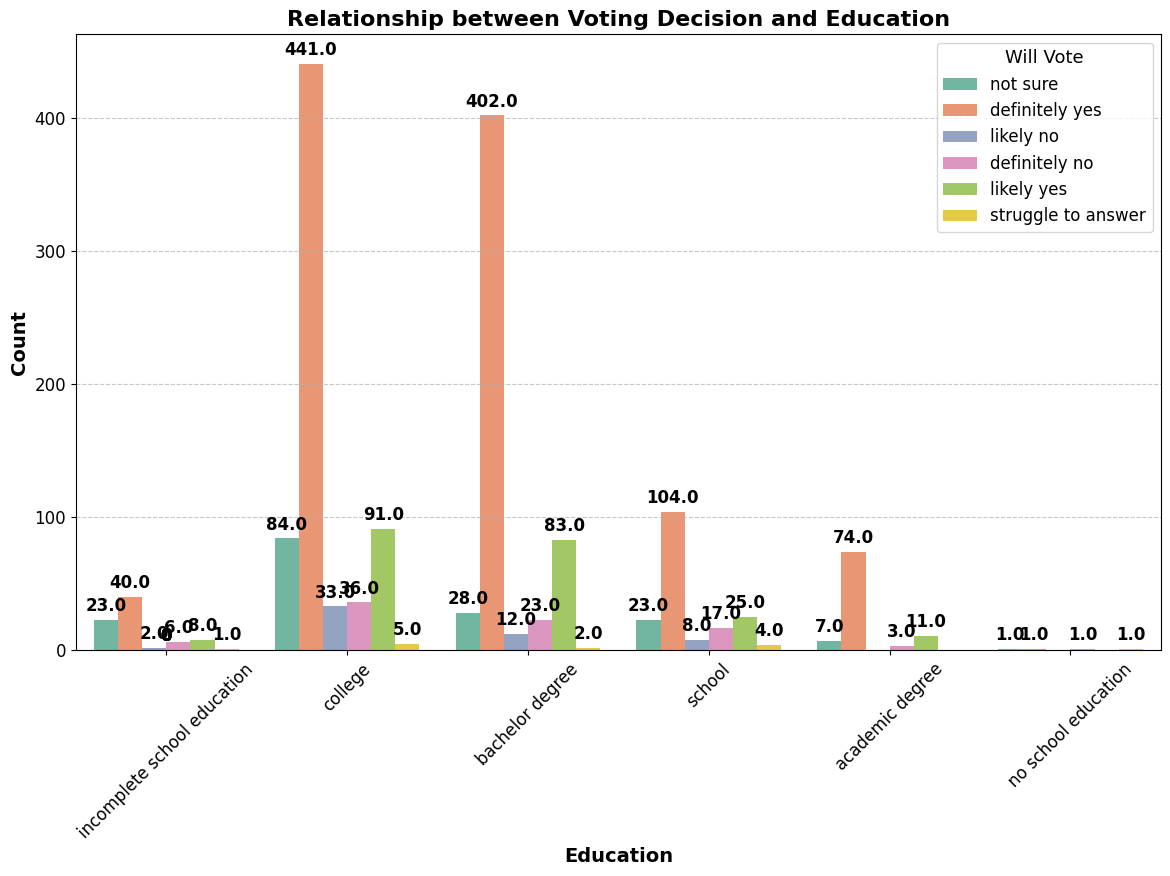

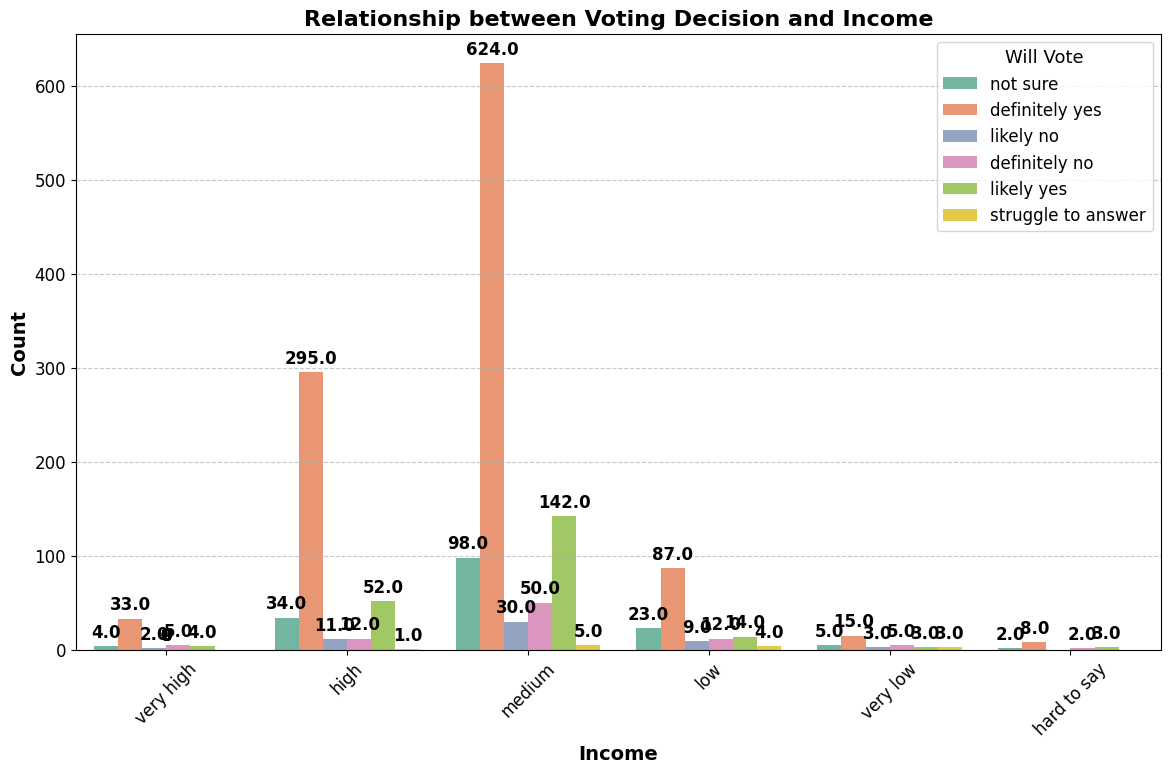

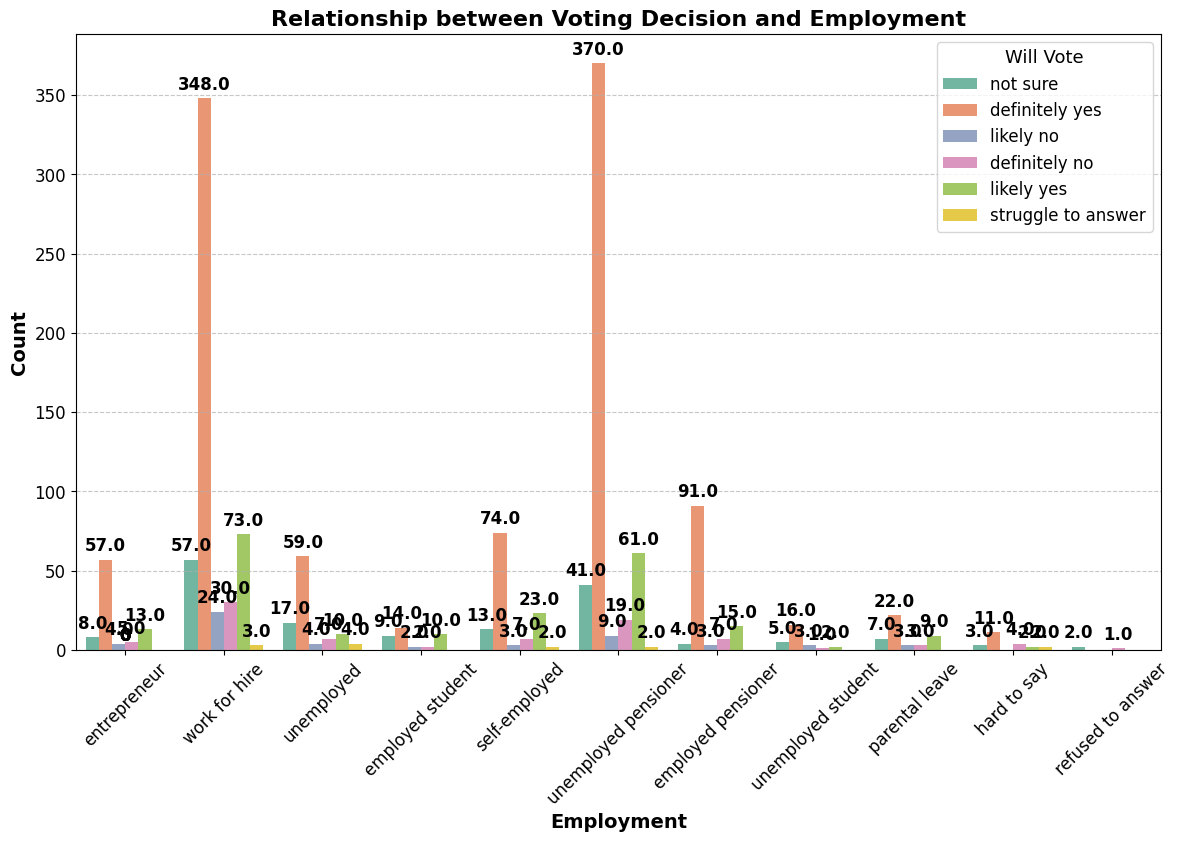

In [91]:
# Relationship between target variable and categorical features
for col in cat_cols:
    if col != 'will_vote':  # Skip the target variable
        plt.figure(figsize=(14, 8))
        
        # Count plot with color
        sns.countplot(data=df, x=col, hue='will_vote', palette='Set2')
        
        plt.title(f'Relationship between Voting Decision and {col.capitalize()}', fontsize=16, fontweight='bold')
        plt.xlabel(col.capitalize(), fontsize=14, fontweight='bold')
        plt.ylabel('Count', fontsize=14, fontweight='bold')
        
        plt.xticks(rotation=45, fontsize=12)
        plt.yticks(fontsize=12)
        
        plt.legend(title='Will Vote', title_fontsize='13', fontsize='12')
        
        # Annotate each bar with the count value
        for p in plt.gca().patches:
            plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                               ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
                               textcoords='offset points', fontweight='bold')
        
        # Add grid for better readability
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

In [92]:
cat_cols

['federal_district',
 'type_of_city',
 'knows_election_date',
 'will_vote',
 'candidate',
 'television_usage',
 'internet_usage',
 'education',
 'income',
 'employment']

In [93]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder = LabelEncoder()

for col in cat_cols:
    if col != 'will_vote':  # Skip the target variable
        df[col] = LabelEncoder.fit_transform(df[col])

In [94]:
df.head()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
0,0,18,2,6,1,not sure,2,5,3,3,4,2,1
1,0,23,2,6,1,not sure,2,2,3,2,4,10,1
2,0,20,7,4,1,definitely yes,2,5,3,2,4,10,1
3,0,22,3,0,0,not sure,0,5,3,2,4,7,1
4,0,21,5,0,1,definitely yes,2,0,3,1,4,1,1


In [95]:
df['will_vote'] = LabelEncoder.fit_transform(df['will_vote'])

In [96]:
df.sample(5)

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
1399,0,61,6,4,1,2,6,3,1,2,3,10,0
146,1,70,6,6,1,1,2,3,0,2,1,8,0
1233,0,56,7,4,1,1,5,0,1,2,3,0,0
1183,0,72,0,1,1,1,2,3,0,5,3,8,0
869,0,36,7,6,1,1,0,4,1,2,3,10,0


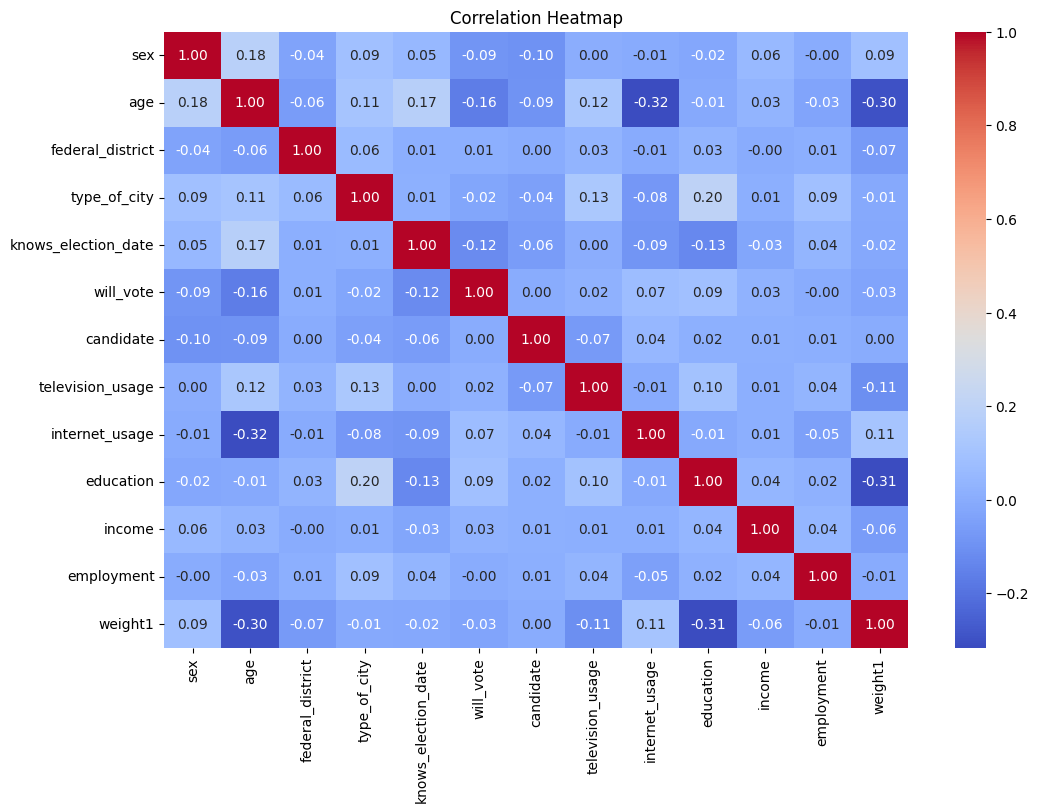

In [97]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


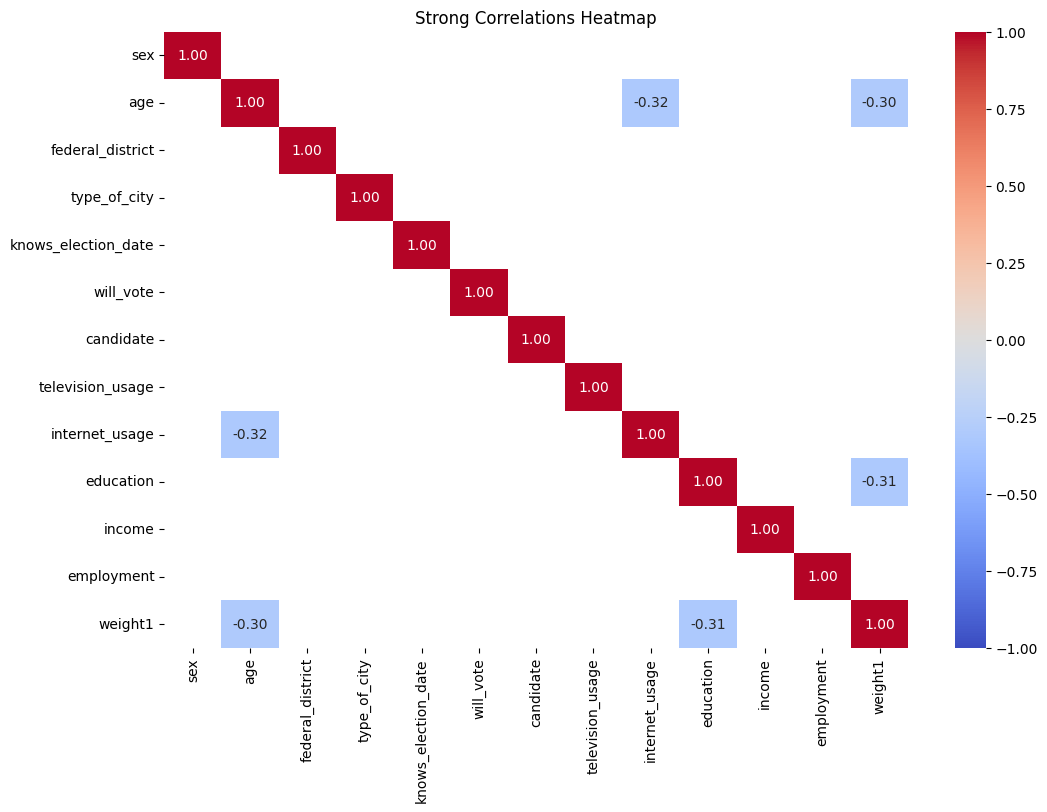

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = df.corr()

# Define a threshold for strong correlations
threshold = 0.3

# Filter the correlation matrix to include only strong correlations
strong_corr_matrix = corr_matrix[(corr_matrix >= threshold) | (corr_matrix <= -threshold)]

# Plot the filtered correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(strong_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Strong Correlations Heatmap')
plt.show()


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   sex                  1600 non-null   int64
 1   age                  1600 non-null   int64
 2   federal_district     1600 non-null   int64
 3   type_of_city         1600 non-null   int64
 4   knows_election_date  1600 non-null   int64
 5   will_vote            1600 non-null   int64
 6   candidate            1600 non-null   int64
 7   television_usage     1600 non-null   int64
 8   internet_usage       1600 non-null   int64
 9   education            1600 non-null   int64
 10  income               1600 non-null   int64
 11  employment           1600 non-null   int64
 12  weight1              1600 non-null   int64
dtypes: int64(13)
memory usage: 162.6 KB


In [99]:
df.describe()

,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,weight1
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.00000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,0.526875,49.936250,3.431250,2.768750,0.850625,1.596875,2.492500,2.02875,1.887500,1.931875,2.445000,7.197500,0.418750
std,0.499433,16.901797,2.657948,2.256869,0.356569,1.158211,1.396393,1.65745,1.431302,1.286767,0.998799,3.126636,0.523039
min,0.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,37.000000,0.000000,1.000000,1.000000,1.000000,2.000000,1.00000,1.000000,1.000000,1.000000,6.000000,0.000000
50%,1.000000,49.000000,4.000000,2.000000,1.000000,1.000000,2.000000,1.00000,1.000000,2.000000,3.000000,8.000000,0.000000
75%,1.000000,64.000000,6.000000,5.000000,1.000000,2.000000,2.000000,3.00000,3.000000,2.000000,3.000000,10.000000,1.000000
max,1.000000,90.000000,7.000000,6.000000,1.000000,5.000000,6.000000,5.00000,5.000000,5.000000,5.000000,10.000000,2.000000
